## Импорт библиотек ##

In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages
import pickle

## Обработка исходных данных ##

Чтение данных из файлов

In [2]:
x_bp_df = pd.read_excel('X_bp.xlsx', sheet_name='X_bp.csv', index_col=0) # базальтопластик
x_nup_df = pd.read_excel('X_nup.xlsx', sheet_name='X_nup.csv', index_col=0) # нашивки углепластиковые

Инфинформация о датасете с базальтопластиками (X_bp_df)

In [3]:
x_bp_df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0.0                         1.857143            2030.0             738.736842   
1.0                         1.857143            2030.0             738.736842   
2.0                         1.857143            2030.0             738.736842   
3.0                         1.857143            2030.0             738.736842   
4.0                         2.771331            2030.0             753.000000   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0.0                        30.00                        22.267857   
1.0                        50.00                        23.750000   
2.0                        49.90                        33.000000   
3.0                       129.00                        21.250000   
4.0                       111.86                        22.267857   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0.0                100.000000                          210.0   
1.0                284.615385                          210.0   
2.0                284.615385                          210.0   
3.0                300.000000                          210.0   
4.0                284.615385                          210.0   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0.0                                  70.0                         3000.0   
1.0                                  70.0                         3000.0   
2.0                                  70.0                         3000.0   
3.0                                  70.0                         3000.0   
4.0                                  70.0                         3000.0   

     Потребление смолы, г/м2  
0.0                    220.0  
1.0                    220.0  
2.0                    220.0  
3.0                    220.0  
4.0                    220.0

In [4]:
x_bp_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


In [5]:
x_bp_df.describe().round(2).T

count     mean     std      min  \
Соотношение матрица-наполнитель       1023.0     2.93    0.91     0.39   
Плотность, кг/м3                      1023.0  1975.73   73.73  1731.76   
модуль упругости, ГПа                 1023.0   739.92  330.23     2.44   
Количество отвердителя, м.%           1023.0   110.57   28.30    17.74   
Содержание эпоксидных групп,%_2       1023.0    22.24    2.41    14.25   
Температура вспышки, С_2              1023.0   285.88   40.94   100.00   
Поверхностная плотность, г/м2         1023.0   482.73  281.31     0.60   
Модуль упругости при растяжении, ГПа  1023.0    73.33    3.12    64.05   
Прочность при растяжении, МПа         1023.0  2466.92  485.63  1036.86   
Потребление смолы, г/м2               1023.0   218.42   59.74    33.80   

                                          25%      50%      75%      max  
Соотношение матрица-наполнитель          2.32     2.91     3.55     5.59  
Плотность, кг/м3                      1924.16  1977.62  2021.37  2207.77  
модуль упругости, ГПа                  500.05   739.66   961.81  1911.54  
Количество отвердителя, м.%             92.44   110.56   129.73   198.95  
Содержание эпоксидных групп,%_2         20.61    22.23    23.96    33.00  
Температура вспышки, С_2               259.07   285.90   313.00   413.27  
Поверхностная плотность, г/м2          266.82   451.86   693.23  1399.54  
Модуль упругости при растяжении, ГПа    71.25    73.27    75.36    82.68  
Прочность при растяжении, МПа         2135.85  2459.52  2767.19  3848.44  
Потребление смолы, г/м2                179.63   219.20   257.48   414.59

In [6]:
x_bp_df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
dtype: int64

In [7]:
x_bp_df.shape

(1023, 10)

Инфинформация о датасете с нашивками углепластиковыми (X_nup_df)

In [8]:
x_nup_df.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0.0                 0.0          4.0               57.0
1.0                 0.0          4.0               60.0
2.0                 0.0          4.0               70.0
3.0                 0.0          5.0               47.0
4.0                 0.0          5.0               57.0

In [9]:
x_nup_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1040 entries, 0.0 to 1039.0
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   float64
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(3)
memory usage: 32.5 KB


In [10]:
x_nup_df.describe().round(2).T

count   mean    std  min    25%    50%    75%     max
Угол нашивки, град  1040.0  45.00  45.02  0.0   0.00  45.00  90.00   90.00
Шаг нашивки         1040.0   6.91   2.56  0.0   5.10   6.94   8.59   14.44
Плотность нашивки   1040.0  57.25  12.33  0.0  49.97  57.41  65.11  103.99

In [11]:
x_nup_df.nunique()

Угол нашивки, град       2
Шаг нашивки           1006
Плотность нашивки     1005
dtype: int64

In [12]:
x_nup_df.shape

(1040, 3)

Объединение датасетов

In [13]:
bp_nup_df = x_bp_df.merge(x_nup_df, left_index=True, right_index=True, how='inner')
# При объединении с помощью метода 'inner' часть строк из большего файла будет отброшена

In [14]:
bp_nup_df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0.0                         1.857143            2030.0             738.736842   
1.0                         1.857143            2030.0             738.736842   
2.0                         1.857143            2030.0             738.736842   
3.0                         1.857143            2030.0             738.736842   
4.0                         2.771331            2030.0             753.000000   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0.0                        30.00                        22.267857   
1.0                        50.00                        23.750000   
2.0                        49.90                        33.000000   
3.0                       129.00                        21.250000   
4.0                       111.86                        22.267857   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0.0                100.000000                          210.0   
1.0                284.615385                          210.0   
2.0                284.615385                          210.0   
3.0                300.000000                          210.0   
4.0                284.615385                          210.0   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0.0                                  70.0                         3000.0   
1.0                                  70.0                         3000.0   
2.0                                  70.0                         3000.0   
3.0                                  70.0                         3000.0   
4.0                                  70.0                         3000.0   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0.0                    220.0                 0.0          4.0   
1.0                    220.0                 0.0          4.0   
2.0                    220.0                 0.0          4.0   
3.0                    220.0                 0.0          5.0   
4.0                    220.0                 0.0          5.0   

     Плотность нашивки  
0.0               57.0  
1.0               60.0  
2.0               70.0  
3.0               47.0  
4.0               57.0

## Разверточный анализ данных ##

Инфинформация об объединенном файле (bp_nup_df)

In [15]:
bp_nup_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

In [16]:
bp_nup_df.shape

(1023, 13)

In [17]:
bp_nup_df.describe().round(2).T

count     mean     std      min  \
Соотношение матрица-наполнитель       1023.0     2.93    0.91     0.39   
Плотность, кг/м3                      1023.0  1975.73   73.73  1731.76   
модуль упругости, ГПа                 1023.0   739.92  330.23     2.44   
Количество отвердителя, м.%           1023.0   110.57   28.30    17.74   
Содержание эпоксидных групп,%_2       1023.0    22.24    2.41    14.25   
Температура вспышки, С_2              1023.0   285.88   40.94   100.00   
Поверхностная плотность, г/м2         1023.0   482.73  281.31     0.60   
Модуль упругости при растяжении, ГПа  1023.0    73.33    3.12    64.05   
Прочность при растяжении, МПа         1023.0  2466.92  485.63  1036.86   
Потребление смолы, г/м2               1023.0   218.42   59.74    33.80   
Угол нашивки, град                    1023.0    44.25   45.02     0.00   
Шаг нашивки                           1023.0     6.90    2.56     0.00   
Плотность нашивки                     1023.0    57.15   12.35     0.00   

                                          25%      50%      75%      max  
Соотношение матрица-наполнитель          2.32     2.91     3.55     5.59  
Плотность, кг/м3                      1924.16  1977.62  2021.37  2207.77  
модуль упругости, ГПа                  500.05   739.66   961.81  1911.54  
Количество отвердителя, м.%             92.44   110.56   129.73   198.95  
Содержание эпоксидных групп,%_2         20.61    22.23    23.96    33.00  
Температура вспышки, С_2               259.07   285.90   313.00   413.27  
Поверхностная плотность, г/м2          266.82   451.86   693.23  1399.54  
Модуль упругости при растяжении, ГПа    71.25    73.27    75.36    82.68  
Прочность при растяжении, МПа         2135.85  2459.52  2767.19  3848.44  
Потребление смолы, г/м2                179.63   219.20   257.48   414.59  
Угол нашивки, град                       0.00     0.00    90.00    90.00  
Шаг нашивки                              5.08     6.92     8.59    14.44  
Плотность нашивки                       49.80    57.34    64.94   103.99

Проверка на наличие дубликатов

In [18]:
bp_nup_df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Построение гистограмм

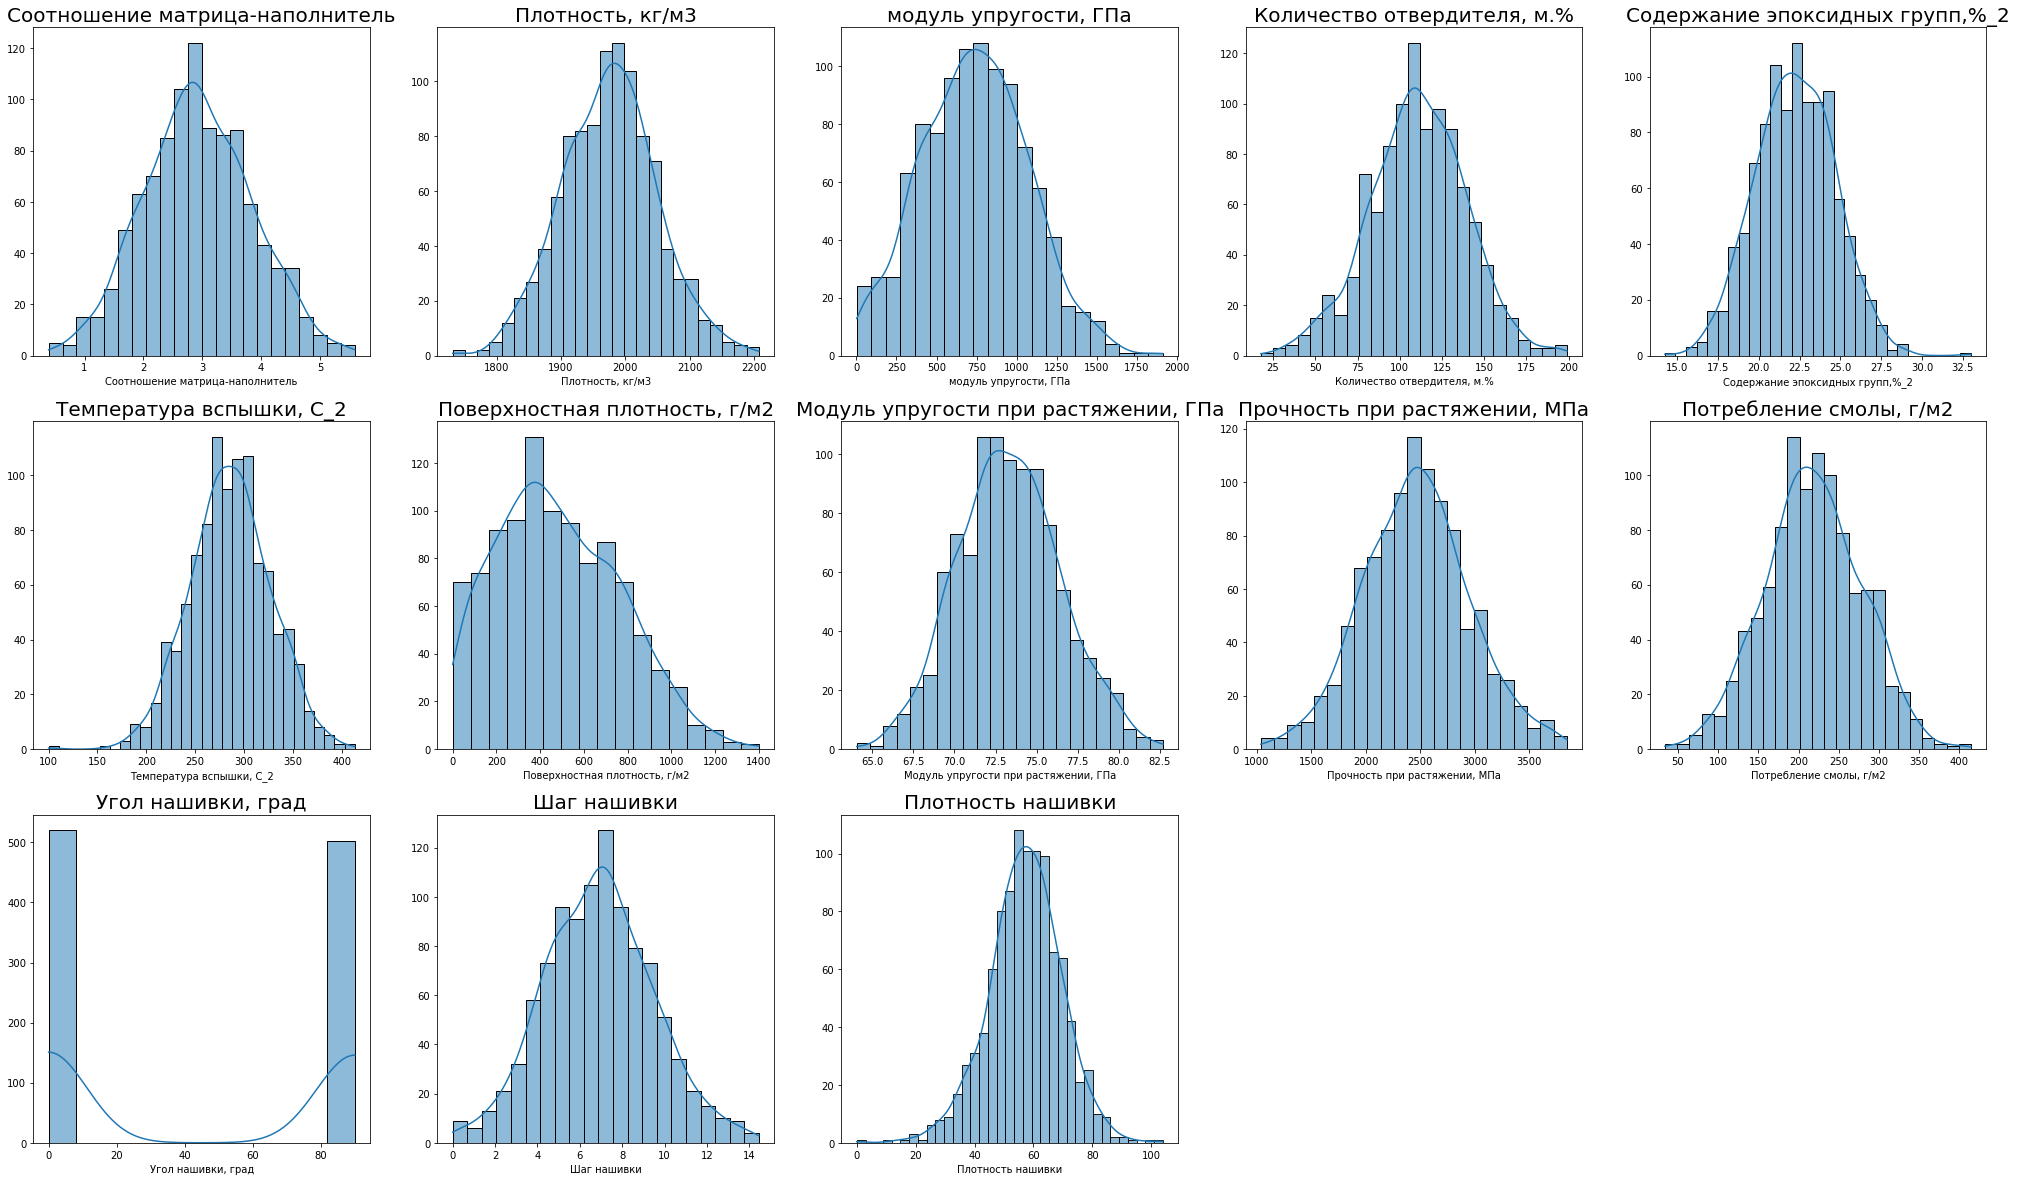

In [19]:
plt.figure(figsize=(35,35))
c = 1
for col in bp_nup_df.columns:
    plt.subplot(5, 5, c)
    sns.histplot(data = bp_nup_df[col], kde=True)
    plt.ylabel(None)
    plt.title(col, size = 20)
    c+=1

Построение боксплотов (ящиков с усами)

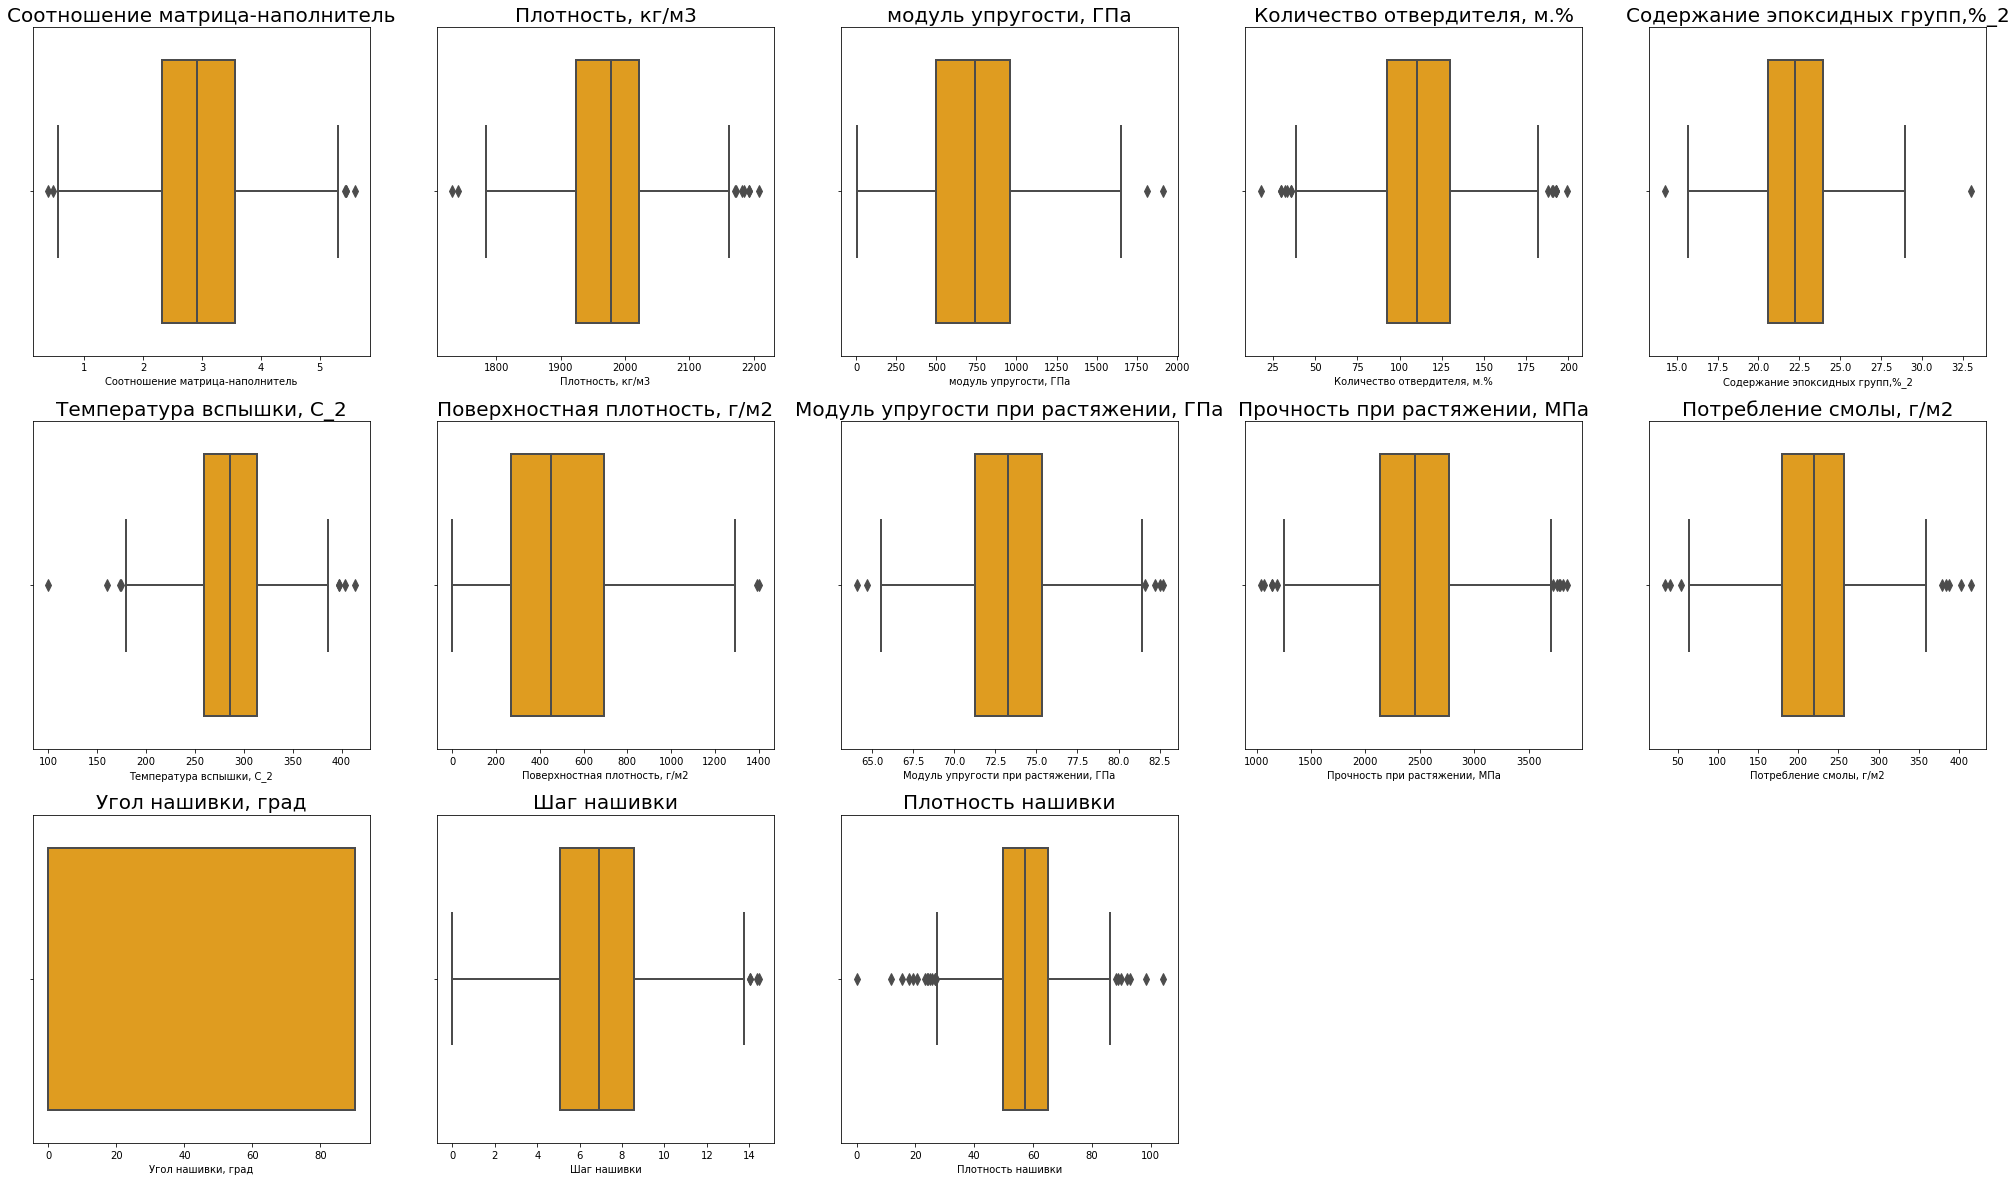

In [20]:
plt.figure(figsize=(35,35))
c = 1
for col in bp_nup_df.columns:
    plt.subplot(5, 5, c)
    sns.boxplot(color= "orange", data = bp_nup_df, x=bp_nup_df[col], fliersize=8, linewidth=2)
    plt.ylabel(None)
    plt.title(col, size = 20)
    c+=1

Определение взаимосвязей между переменными с помощью графика рассеяния точек

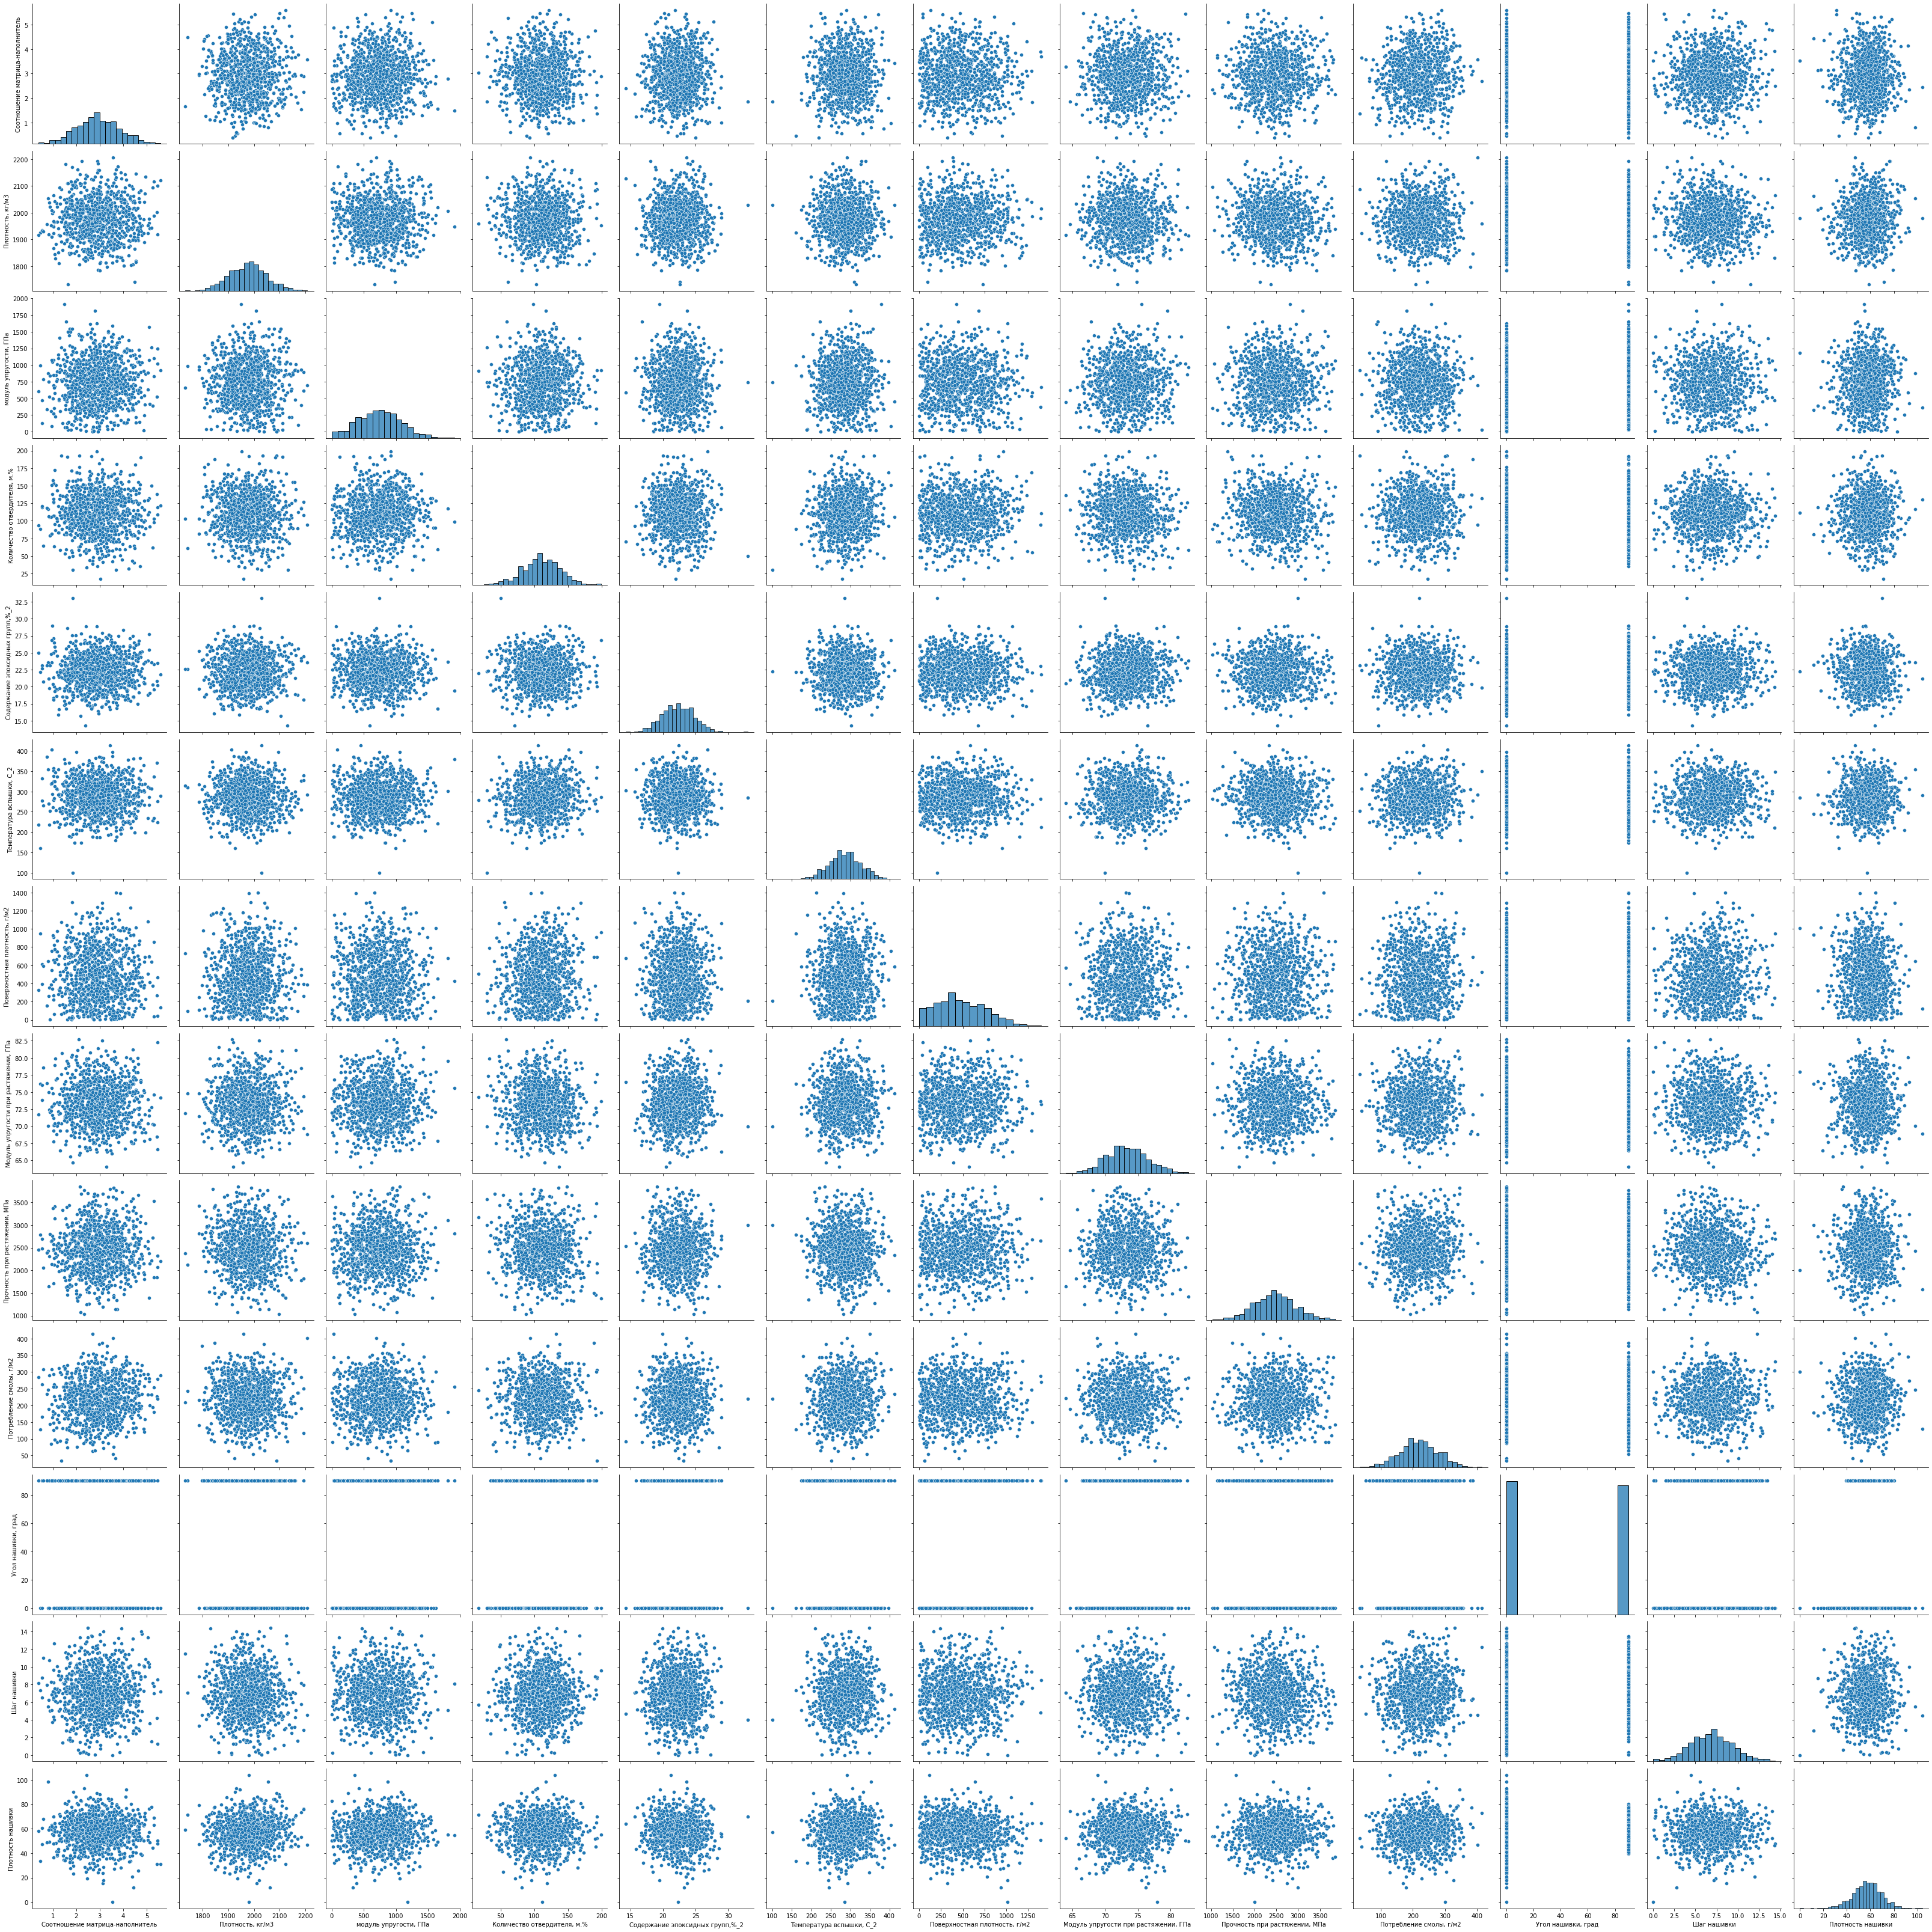

In [21]:
sns.pairplot(bp_nup_df, height=3.5)

Определение взаимосвязей между переменными с помощью тепловой карты

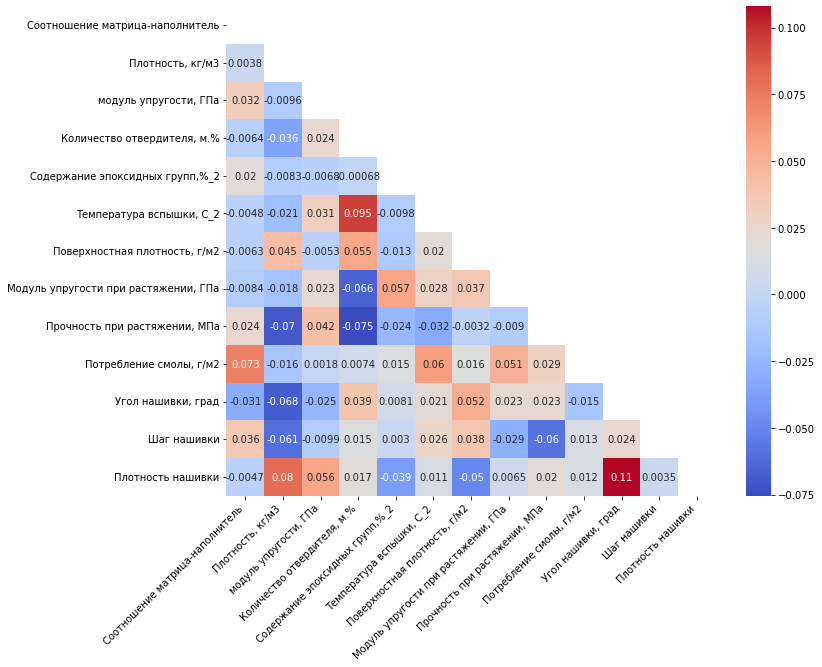

In [22]:
mask = np.triu(bp_nup_df.corr())
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(bp_nup_df.corr(), mask=mask, annot=True, square=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.show()

## Предобработка данных ##

Удаление выбросов

In [23]:
for col in bp_nup_df.columns:
    q75,q25 = np.percentile(bp_nup_df.loc[:,col],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    bp_nup_df.loc[bp_nup_df[col] < min,col] = np.nan
    bp_nup_df.loc[bp_nup_df[col] > max,col] = np.nan

In [24]:
clean_outliers_bp_nup_df = bp_nup_df.dropna(axis=0)

In [25]:
clean_outliers_bp_nup_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 936 entries, 1.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       936 non-null    float64
 1   Плотность, кг/м3                      936 non-null    float64
 2   модуль упругости, ГПа                 936 non-null    float64
 3   Количество отвердителя, м.%           936 non-null    float64
 4   Содержание эпоксидных групп,%_2       936 non-null    float64
 5   Температура вспышки, С_2              936 non-null    float64
 6   Поверхностная плотность, г/м2         936 non-null    float64
 7   Модуль упругости при растяжении, ГПа  936 non-null    float64
 8   Прочность при растяжении, МПа         936 non-null    float64
 9   Потребление смолы, г/м2               936 non-null    float64
 10  Угол нашивки, град                    936 non-null    float64
 11  Шаг нашивки 

Нормализация данных

In [26]:
min_max_scaler = MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(clean_outliers_bp_nup_df), 
                       columns=clean_outliers_bp_nup_df.columns,
                       index=clean_outliers_bp_nup_df.index)
df_norm

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1.0                            0.274768          0.651097   
3.0                            0.274768          0.651097   
4.0                            0.466552          0.651097   
5.0                            0.465836          0.571539   
6.0                            0.424236          0.332865   
...                                 ...               ...   
1018.0                         0.361662          0.444480   
1019.0                         0.607674          0.704373   
1020.0                         0.573391          0.498274   
1021.0                         0.662497          0.748688   
1022.0                         0.684036          0.280923   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
1.0                  0.447061                     0.079153   
3.0                  0.447061                     0.630983   
4.0                  0.455721                     0.511257   
5.0                  0.452685                     0.511257   
6.0                  0.488508                     0.511257   
...                       ...                          ...   
1018.0               0.552781                     0.337550   
1019.0               0.268550                     0.749605   
1020.0               0.251612                     0.501991   
1021.0               0.448724                     0.717585   
1022.0               0.251903                     0.632264   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1.0                            0.607435                  0.509164   
3.0                            0.418887                  0.583596   
4.0                            0.495653                  0.509164   
5.0                            0.495653                  0.509164   
6.0                            0.495653                  0.509164   
...                                 ...                       ...   
1018.0                         0.333908                  0.703458   
1019.0                         0.294428                  0.362087   
1020.0                         0.623085                  0.334063   
1021.0                         0.267818                  0.466417   
1022.0                         0.888354                  0.588206   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1.0                          0.162230                              0.280303   
3.0                          0.162230                              0.280303   
4.0                          0.162230                              0.280303   
5.0                          0.162230                              0.280303   
6.0                          0.162230                              0.280303   
...                               ...                                   ...   
1018.0                       0.161609                              0.475147   
1019.0                       0.271207                              0.464422   
1020.0                       0.572959                              0.578740   
1021.0                       0.496511                              0.535142   
1022.0                       0.587373                              0.551972   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1.0                          0.712590                 0.529221   
3.0                          0.712590                 0.529221   
4.0                          0.712590                 0.529221   
5.0                          0.712590                 0.529221   
6.0                          0.712590                 0.529221   
...                               ...                      ...   
1018.0                       0.463043                 0.207613   
1019.0                       0.452087                 0.182974   
1020.0                       0.575296                 0.585446   
1021.0                       0.334513                 0.451779   
1022.0                    

In [27]:
df_norm.describe().round(2).T

count  mean   std  min   25%   50%  \
Соотношение матрица-наполнитель       936.0  0.50  0.19  0.0  0.37  0.49   
Плотность, кг/м3                      936.0  0.50  0.19  0.0  0.37  0.51   
модуль упругости, ГПа                 936.0  0.45  0.20  0.0  0.30  0.45   
Количество отвердителя, м.%           936.0  0.50  0.19  0.0  0.38  0.51   
Содержание эпоксидных групп,%_2       936.0  0.49  0.18  0.0  0.37  0.49   
Температура вспышки, С_2              936.0  0.52  0.19  0.0  0.39  0.52   
Поверхностная плотность, г/м2         936.0  0.37  0.22  0.0  0.21  0.35   
Модуль упругости при растяжении, ГПа  936.0  0.49  0.19  0.0  0.36  0.49   
Прочность при растяжении, МПа         936.0  0.50  0.19  0.0  0.37  0.49   
Потребление смолы, г/м2               936.0  0.52  0.20  0.0  0.39  0.52   
Угол нашивки, град                    936.0  0.51  0.50  0.0  0.00  1.00   
Шаг нашивки                           936.0  0.50  0.18  0.0  0.37  0.50   
Плотность нашивки                     936.0  0.51  0.19  0.0  0.39  0.52   

                                       75%  max  
Соотношение матрица-наполнитель       0.63  1.0  
Плотность, кг/м3                      0.62  1.0  
модуль упругости, ГПа                 0.58  1.0  
Количество отвердителя, м.%           0.64  1.0  
Содержание эпоксидных групп,%_2       0.62  1.0  
Температура вспышки, С_2              0.65  1.0  
Поверхностная плотность, г/м2         0.54  1.0  
Модуль упругости при растяжении, ГПа  0.62  1.0  
Прочность при растяжении, МПа         0.61  1.0  
Потребление смолы, г/м2               0.65  1.0  
Угол нашивки, град                    1.00  1.0  
Шаг нашивки                           0.62  1.0  
Плотность нашивки                     0.64  1.0

Построение гистограмм для нормализованных данных

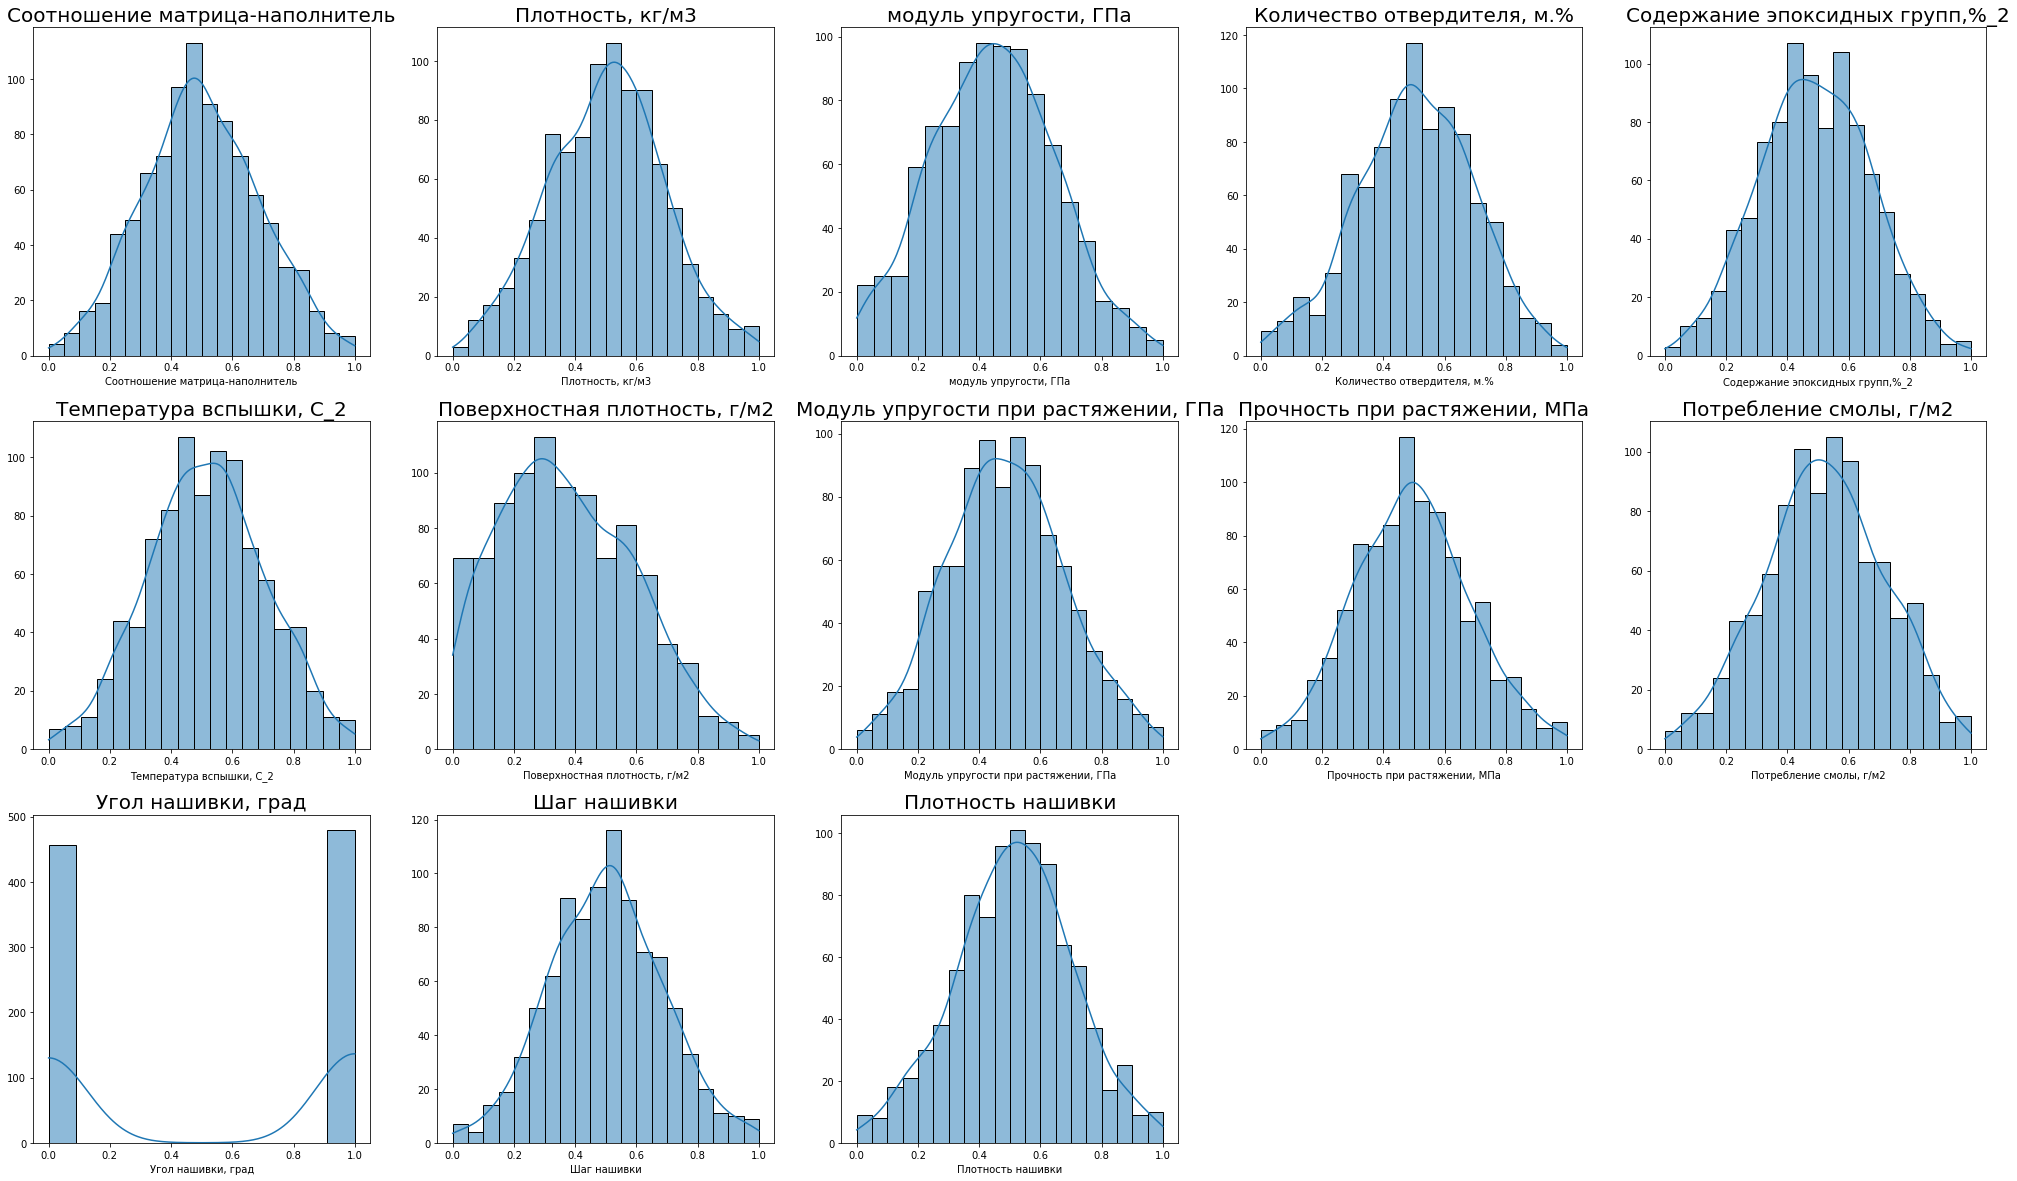

In [28]:
plt.figure(figsize=(35,35))
c = 1
for col in df_norm.columns:
    plt.subplot(5, 5, c)
    sns.histplot(data = df_norm[col], kde=True)
    plt.ylabel(None)
    plt.title(col, size = 20)
    c+=1

Построение боксплотов (ящиков с усами) для нормализованных данных

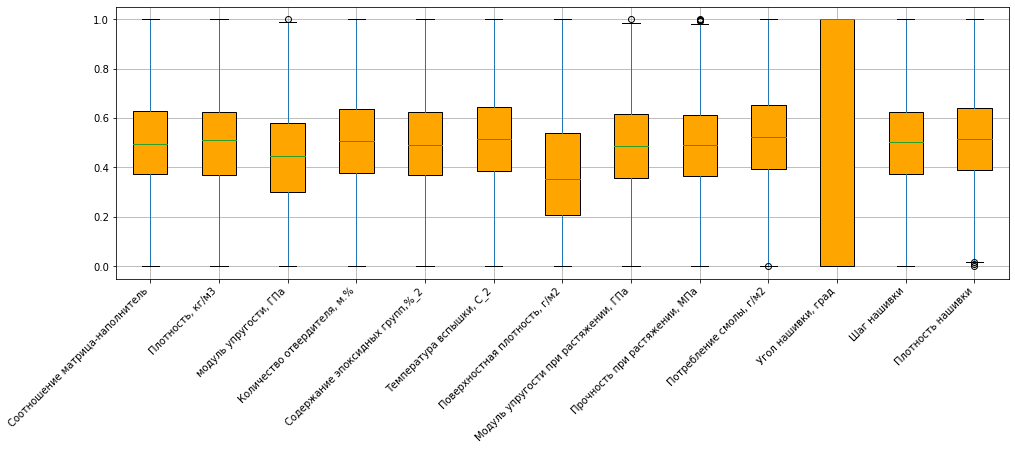

In [29]:
boxplot = df_norm.boxplot(rot=90, figsize=(16, 5), patch_artist=True, boxprops=dict(facecolor="orange", color="black"))
plt.xticks(rotation=45, ha='right')
plt.show()

## Обучение моделей для прогноза упругости при растяжении и прочности при растяжении ##

Разбиение на обучающую и тестовую выборки

In [30]:
x_upr = df_norm.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
x_pr = df_norm.drop(['Прочность при растяжении, МПа'], axis=1)
y_upr = df_norm[['Модуль упругости при растяжении, ГПа']]
y_pr = df_norm[['Прочность при растяжении, МПа']]

X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(x_upr, y_upr, test_size=0.3, random_state=1)
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(x_pr, y_pr, test_size=0.3, random_state=1)

1 Линейная регрессия

In [31]:
lr = LinearRegression()
lr_params = {
    'fit_intercept' : ['True', 'False']
    }

1.1 Для модуля упругости при растяжении

In [32]:
GSCV_lr_upr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_upr.fit(X_train_upr, y_train_upr)
GSCV_lr_upr.best_params_

{'fit_intercept': 'True'}

In [33]:
lr_upr = GSCV_lr_upr.best_estimator_
print(f'R2-score LR для модуля упругости при растяжении: {lr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score LR для модуля упругости при растяжении: -0.021


In [34]:
lr_upr_result = pd.DataFrame({
    'Model': 'LinearRegression_upr', 
    'MAE': mean_absolute_error(y_test_upr, lr_upr.predict(X_test_upr)), 
    'R2 score': lr_upr.score(X_test_upr, y_test_upr).round(3)
    }, index=['Модуль упругости при растяжении'])

In [35]:
models = pd.DataFrame()
models = pd.concat([models, lr_upr_result])
lr_upr_result

Model       MAE  R2 score
Модуль упругости при растяжении  LinearRegression_upr  0.160518    -0.021

1.2 Для прочности при растяжении

In [36]:
GSCV_lr_pr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_pr.fit(X_train_pr, y_train_pr)
GSCV_lr_pr.best_params_

{'fit_intercept': 'True'}

In [37]:
lr_pr = GSCV_lr_pr.best_estimator_
print(f'R2-score LR для прочности при растяжении: {lr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score LR для прочности при растяжении: -0.021


In [38]:
lr_pr_result = pd.DataFrame({
    'Model': 'LinearRegression_pr', 
    'MAE': mean_absolute_error(y_test_pr, lr_pr.predict(X_test_pr)), 
    'R2 score': lr_pr.score(X_test_pr, y_test_pr).round(3)
    }, index=['Прочность при растяжении'])

In [39]:
models = pd.concat([models, lr_pr_result])
lr_pr_result

Model       MAE  R2 score
Прочность при растяжении  LinearRegression_pr  0.150917    -0.021

2 Метод К ближайших соседей

In [40]:
knr = KNeighborsRegressor()
knr_params = {'n_neighbors' : range(1, 301, 2), 
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
             }

2.1. Для модуля упругости при растяжении

In [41]:
GSCV_knr_upr = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10)
GSCV_knr_upr.fit(X_train_upr, y_train_upr)
GSCV_knr_upr.best_params_

{'algorithm': 'auto', 'n_neighbors': 59, 'weights': 'uniform'}

In [42]:
knr_upr = GSCV_knr_upr.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {knr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score KNR для модуля упругости при растяжении: -0.005


In [43]:
knr_upr_result = pd.DataFrame({
    'Model': 'KNeighborsRegressor_upr', 
    'MAE': mean_absolute_error(y_test_upr, knr_upr.predict(X_test_upr)), 
    'R2 score': knr_upr.score(X_test_upr, y_test_upr).round(3)
    }, index=['Модуль упругости при растяжении'])

In [44]:
models = pd.concat([models, knr_upr_result])
knr_upr_result

Model       MAE  R2 score
Модуль упругости при растяжении  KNeighborsRegressor_upr  0.160652    -0.005

2.2 Для прочности при растяжении

In [45]:
GSCV_knr_pr = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10)
GSCV_knr_pr.fit(X_train_pr, y_train_pr)
GSCV_knr_pr.best_params_

{'algorithm': 'brute', 'n_neighbors': 237, 'weights': 'distance'}

In [46]:
knr_pr = GSCV_knr_pr.best_estimator_
print(f'R2-score KNR для прочности при растяжении: {knr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score KNR для прочности при растяжении: -0.016


In [47]:
knr_pr_result = pd.DataFrame({
    'Model': 'KNeighborsRegressor_pr', 
    'MAE': mean_absolute_error(y_test_pr, knr_pr.predict(X_test_pr)), 
    'R2 score': knr_pr.score(X_test_pr, y_test_pr).round(3)
    }, index=['Прочность при растяжении'])

In [48]:
models = pd.concat([models, knr_pr_result])
knr_pr_result

Model       MAE  R2 score
Прочность при растяжении  KNeighborsRegressor_pr  0.150263    -0.016

3 Случайный лес

In [49]:
rfr = RandomForestRegressor()
rfr_params = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'bootstrap' : ['True', 'False']
    }

3.1. Для модуля упругости при растяжении

In [50]:
RSCV_rfr_upr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_upr.fit(X_train_upr, np.ravel(y_train_upr))
RSCV_rfr_upr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 470,
 'min_samples_split': 45,
 'min_samples_leaf': 3,
 'max_depth': 2,
 'criterion': 'squared_error',
 'bootstrap': 'True'}

In [51]:
rfr_upr = RSCV_rfr_upr.best_estimator_
print(f'R2-score RFR для модуля упругости при растяжении: {rfr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score RFR для модуля упругости при растяжении: -0.019


In [52]:
rfr_upr_result = pd.DataFrame({
    'Model': 'RandomForestRegressor_upr', 
    'MAE': mean_absolute_error(y_test_upr, rfr_upr.predict(X_test_upr)), 
    'R2 score': rfr_upr.score(X_test_upr, y_test_upr).round(3)
    }, index=['Модуль упругости при растяжении'])

In [53]:
models = pd.concat([models, rfr_upr_result])
rfr_upr_result

Model       MAE  R2 score
Модуль упругости при растяжении  RandomForestRegressor_upr  0.160616    -0.019

3.2 Для прочности при растяжении

In [54]:
RSCV_rfr_pr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_pr.fit(X_train_pr, np.ravel(y_train_pr))
RSCV_rfr_pr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 550,
 'min_samples_split': 40,
 'min_samples_leaf': 2,
 'max_depth': 2,
 'criterion': 'absolute_error',
 'bootstrap': 'False'}

In [55]:
rfr_pr = RSCV_rfr_pr.best_estimator_
print(f'R2-score RFR для прочности при растяжении: {rfr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score RFR для прочности при растяжении: -0.004


In [56]:
rfr_pr_result = pd.DataFrame({
    'Model': 'RandomForestRegressor_pr', 
    'MAE': mean_absolute_error(y_test_pr, rfr_pr.predict(X_test_pr)), 
    'R2 score': rfr_pr.score(X_test_pr, y_test_pr).round(3)
    }, index=['Прочность при растяжении'])

In [57]:
models = pd.concat([models, rfr_pr_result])
rfr_pr_result

Model      MAE  R2 score
Прочность при растяжении  RandomForestRegressor_pr  0.14986    -0.004

Сравнение показателей моделей

In [58]:
models

Model       MAE  R2 score
Модуль упругости при растяжении       LinearRegression_upr  0.160518    -0.021
Прочность при растяжении               LinearRegression_pr  0.150917    -0.021
Модуль упругости при растяжении    KNeighborsRegressor_upr  0.160652    -0.005
Прочность при растяжении            KNeighborsRegressor_pr  0.150263    -0.016
Модуль упругости при растяжении  RandomForestRegressor_upr  0.160616    -0.019
Прочность при растяжении          RandomForestRegressor_pr  0.149860    -0.004

## Поиск гипперпараметров ##

1 Линейная регрессия

1.1 Для модуля упругости

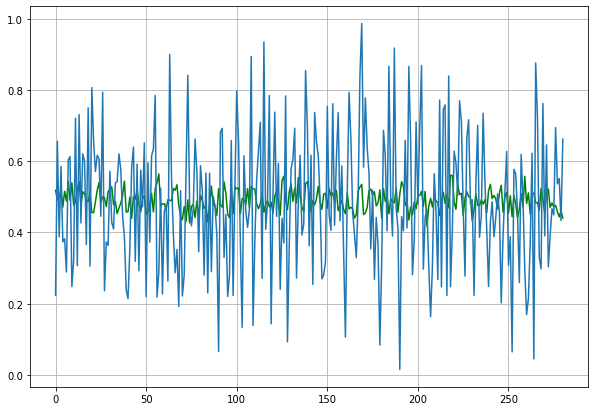

In [59]:
lr.fit(X_train_upr, y_train_upr)
y_pred_lr = lr.predict(X_test_upr)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_lr, "g", label="prediction")
plt.plot(y_test_upr.values, label="actual")
plt.grid(True)

1.2 Для прочности при растяжении

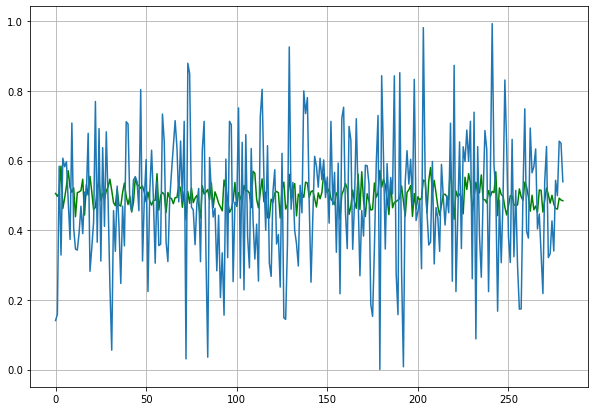

In [60]:
lr.fit(X_train_pr, y_train_pr)
y_pred_lr = lr.predict(X_test_pr)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_lr, "g", label="prediction")
plt.plot(y_test_pr.values, label="actual")
plt.grid(True)

2 Метод К ближайших соседей

2.1 Для модуля упругости

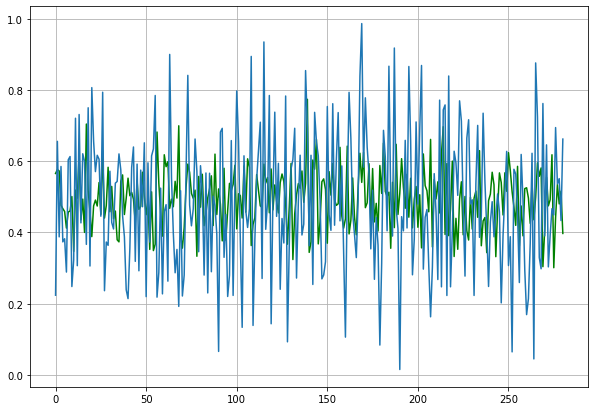

In [61]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_upr, y_train_upr)
y_pred_knn = knn.predict(X_test_upr)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_knn, "g", label="prediction")
plt.plot(y_test_upr.values, label="actual")
plt.grid(True)

In [62]:
param_grid = {"n_neighbors": range(1, 50)}
gs_upr = GridSearchCV(knn, param_grid, cv=10, verbose=1, n_jobs=1)
gs_upr.fit(X_train_upr,y_train_upr)
knn = gs_upr.best_estimator_
gs_upr.best_params_

Fitting 10 folds for each of 49 candidates, totalling 490 fits


{'n_neighbors': 48}

2.2 Для прочности при растяжении

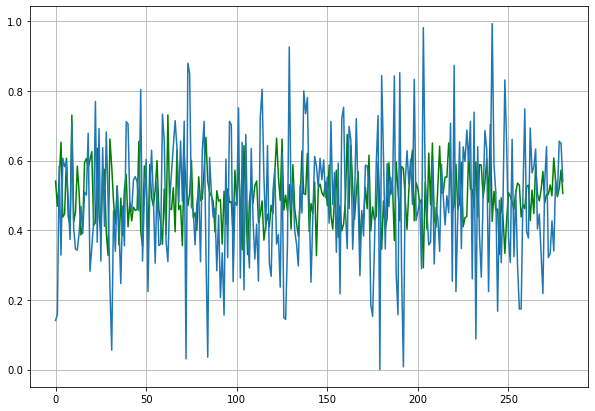

In [63]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_pr, y_train_pr)
y_pred_knn = knn.predict(X_test_pr)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_knn, "g", label="prediction")
plt.plot(y_test_pr.values, label="actual")
plt.grid(True)

In [64]:
param_grid = {"n_neighbors": range(1, 50)}
gs_pr = GridSearchCV(knn, param_grid, cv=10, verbose=1, n_jobs=1)
gs_pr.fit(X_train_pr,y_train_pr)
knn_3 = gs_pr.best_estimator_
gs_pr.best_params_

Fitting 10 folds for each of 49 candidates, totalling 490 fits


{'n_neighbors': 31}

3 Случайный лес

3.1 Для модуля упругости

In [65]:
n_estimators = [5, 7, 9, 11, 15, 20, 40]
max_depth = [1, 2, 3, 4, 5]
min_samples_split = [23, 24, 25, 26]
min_samples_leaf = [3, 4, 5, 6]
bootstrap = [True]
param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
gs_upr = GridSearchCV(RandomForestRegressor(), param_grid, cv=10, verbose=1, n_jobs=-1)
gs_upr.fit(X_train_upr, y_train_upr)
rfr_3 = gs_upr.best_estimator_
gs_upr.best_params_

Fitting 10 folds for each of 560 candidates, totalling 5600 fits


c:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 24,
 'n_estimators': 20}

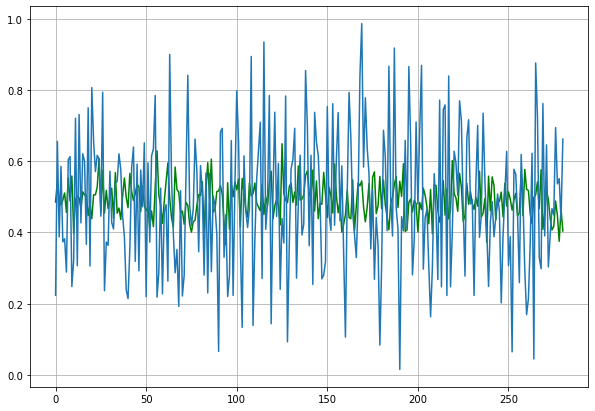

In [66]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=18)
rfr.fit(X_train_upr, y_train_upr.values[:, 0])
y_pred_upr_forest = rfr.predict(X_test_upr)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_upr_forest, "g", label="prediction")
plt.plot(y_test_upr.values, label="actual")
plt.grid(True)

3.2 Для прочности при растяжении

In [67]:
n_estimators = [5, 7, 9, 11, 15, 20, 40]
max_depth = [1, 2, 3, 4, 5]
min_samples_split = [23, 24, 25, 26]
min_samples_leaf = [3, 4, 5, 6]
bootstrap = [True]
param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
gs_pr = GridSearchCV(RandomForestRegressor(), param_grid, cv=10, verbose=1, n_jobs=-1)
gs_pr.fit(X_train_pr, y_train_pr)
rfr_3 = gs_pr.best_estimator_
gs_pr.best_params_

Fitting 10 folds for each of 560 candidates, totalling 5600 fits


c:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 1,
 'min_samples_leaf': 3,
 'min_samples_split': 23,
 'n_estimators': 5}

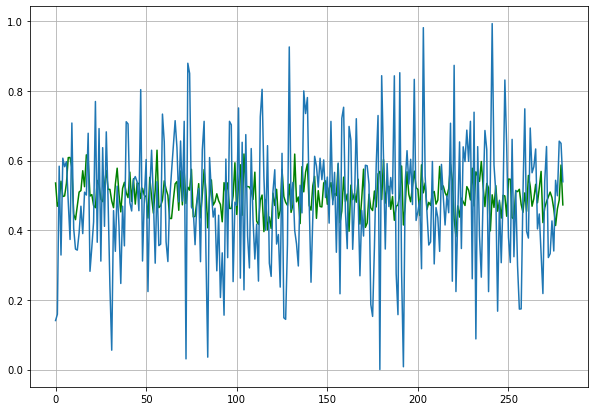

In [68]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=18)
rfr.fit(X_train_pr, y_train_pr.values[:, 0])
y_pred_pr_forest = rfr.predict(X_test_pr)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_pr_forest, "g", label="prediction")
plt.plot(y_test_pr.values, label="actual")
plt.grid(True)

## Создание нейронных сетей ##

In [69]:
# Костыли
df_norm.index = df_norm.index.astype('int')
df = df_norm.dropna(axis=0)

In [70]:
normalizer = tf.keras.layers.Normalization(axis=-1)

Разбиение на обучающую и тестовую выборки

In [71]:
x_upr = df_norm.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
x_pr = df_norm.drop(['Прочность при растяжении, МПа'], axis=1)
x_mn = df_norm.drop(['Соотношение матрица-наполнитель'], axis=1)
y_upr = df_norm[['Модуль упругости при растяжении, ГПа']]
y_pr = df_norm[['Прочность при растяжении, МПа']]
y_mn = df_norm[['Соотношение матрица-наполнитель']]

X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(x_upr, y_upr, test_size=0.3, random_state=1)
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(x_pr, y_pr, test_size=0.3, random_state=1)
X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(x_mn, y_mn, test_size=0.3, random_state=1)

Функция для построения графика потерь модели на тренировочной и тестовой выборках

In [72]:
def model_loss_plot(model_history):
    plt.figure(figsize=(10, 5))
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Средняя абсолютная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

Функция для построения графика оригинального и предсказанного значения у

In [73]:
def actual_and_predicted_plot(original_y, predicted_y):    
    plt.figure(figsize=(10,5))
    plt.title('Тестовые и прогнозные значения', size=12)
    plt.plot(original_y, color='blue', label = 'Тестовые значения')
    plt.plot(predicted_y, color='red', label = 'Прогнозные значения')
    plt.legend(loc='best')
    plt.show()

Функция для построения точечного графика оригинального и предсказанного значения у

In [74]:
def actual_and_predicted_scatter(original_y, predicted_y):
    plt.figure(figsize=(10,5))
    plt.title('Рассеяние тестовых и прогнозных значений', size=15)
    plt.scatter(original_y, predicted_y)
    plt.xlabel('Тестовые значения', size=12)
    plt.ylabel('Прогнозные значения', size=12)
    plt.show()

Нейронная сеть для прогноза модуля упругости при растяжении

In [75]:
X_train_upr_norm = normalizer.adapt(np.array(X_train_upr))

In [76]:
model_upr = Sequential(X_train_upr_norm)

model_upr.add(Dense(64))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(32))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(32))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(1))
model_upr.add(Activation(activation='elu'))

In [77]:
model_upr.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False),
    loss='mean_absolute_error')

In [78]:
early_upr = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

In [79]:
%%time
history_upr = model_upr.fit(
    X_train_upr,
    y_train_upr,
    batch_size = 64,
    epochs=40,
    verbose=1,
    validation_split = 0.2,
    callbacks=[early_upr])

Epoch 1/40
9/9 [==============================] - 9s 118ms/step - loss: 0.5635 - val_loss: 0.2958
Epoch 2/40
9/9 [==============================] - 0s 17ms/step - loss: 0.3191 - val_loss: 0.2449
Epoch 3/40
9/9 [==============================] - 0s 19ms/step - loss: 0.2300 - val_loss: 0.3273
Epoch 4/40
9/9 [==============================] - 0s 18ms/step - loss: 0.2023 - val_loss: 0.2980
Epoch 5/40
9/9 [==============================] - 0s 19ms/step - loss: 0.1829 - val_loss: 0.2798
Epoch 6/40
9/9 [==============================] - 0s 16ms/step - loss: 0.1689 - val_loss: 0.2601
Epoch 7/40
9/9 [==============================] - 0s 17ms/step - loss: 0.1626 - val_loss: 0.2679
Epoch 8/40
9/9 [==============================] - 0s 19ms/step - loss: 0.1580 - val_loss: 0.2357
Epoch 9/40
9/9 [==============================] - 0s 18ms/step - loss: 0.1566 - val_loss: 0.2169
Epoch 10/40
9/9 [==============================] - 0s 17ms/step - loss: 0.1591 - val_loss: 0.1698
Epoch 11/40
9/9 [===========

In [80]:
model_upr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32)                0

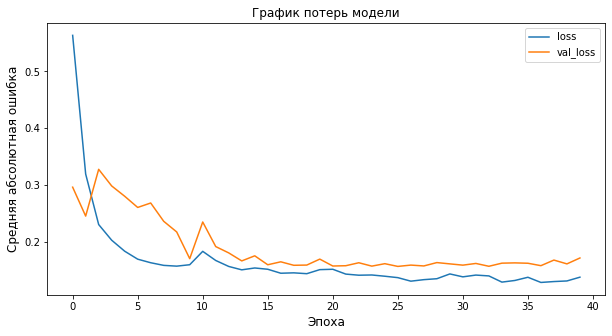

In [81]:
model_loss_plot(history_upr)

9/9 [==============================] - 1s 4ms/step


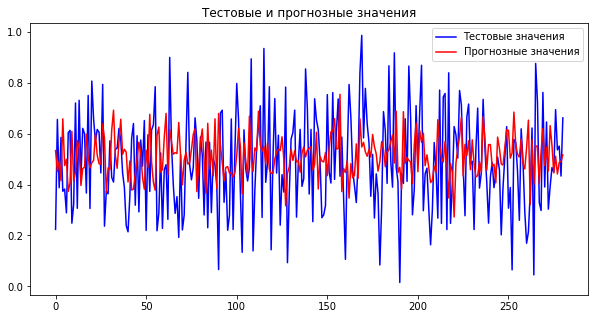

In [82]:
pred_upr = model_upr.predict(np.array((X_test_upr)))
original_upr = y_test_upr.values
predicted_upr = pred_upr

actual_and_predicted_plot(original_upr, predicted_upr)

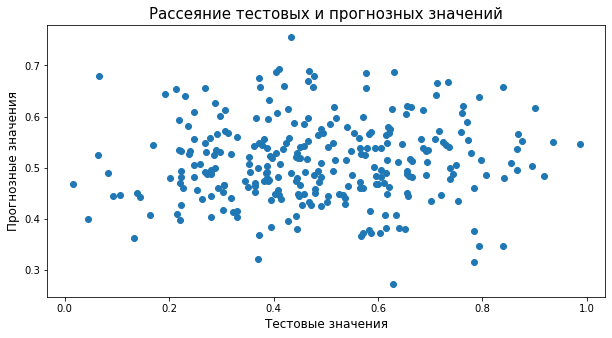

In [83]:
actual_and_predicted_scatter(original_upr, predicted_upr)

In [84]:
print(f'Model MAE: {model_upr.evaluate(X_test_upr, y_test_upr, verbose=1)}')

9/9 [==============================] - 0s 4ms/step - loss: 0.1698
Model MAE: 0.16978482902050018


In [85]:
print(f'MAE среднего значения: {np.mean(np.abs(y_test_upr-np.mean(y_test_upr)))}')

MAE среднего значения: Модуль упругости при растяжении, ГПа    0.158629
dtype: float64


c:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [86]:
pickle.dump(model_upr, open('model_upr.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://3272677d-38a4-4df1-b3ef-70633e088838/assets


Нейронная сеть для прогноза прочности при растяжении

In [87]:
X_train_pr_norm = normalizer.adapt(np.array(X_train_pr))

In [88]:
model_pr = Sequential(X_train_pr_norm)

model_pr.add(Dense(64))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(64))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(32))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(1))
model_pr.add(Activation('selu'))

In [89]:
model_pr.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01),
    loss='mean_absolute_error'
    )

In [90]:
early_pr = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

In [91]:
%%time
history_pr = model_pr.fit(
    X_train_pr,
    y_train_pr,
    batch_size = 32,
    epochs=50,
    verbose=1,
    validation_split = 0.2,
    callbacks=[early_pr])

Epoch 1/50
17/17 [==============================] - 4s 65ms/step - loss: 0.5224 - val_loss: 0.3417
Epoch 2/50
17/17 [==============================] - 0s 10ms/step - loss: 0.3443 - val_loss: 0.2663
Epoch 3/50
17/17 [==============================] - 0s 11ms/step - loss: 0.2802 - val_loss: 0.2640
Epoch 4/50
17/17 [==============================] - 0s 9ms/step - loss: 0.2496 - val_loss: 0.2460
Epoch 5/50
17/17 [==============================] - 0s 11ms/step - loss: 0.2359 - val_loss: 0.2283
Epoch 6/50
17/17 [==============================] - 0s 11ms/step - loss: 0.2248 - val_loss: 0.2367
Epoch 7/50
17/17 [==============================] - 0s 11ms/step - loss: 0.2174 - val_loss: 0.2182
Epoch 8/50
17/17 [==============================] - 0s 11ms/step - loss: 0.2080 - val_loss: 0.2185
Epoch 9/50
17/17 [==============================] - 0s 12ms/step - loss: 0.2074 - val_loss: 0.2229
Epoch 10/50
17/17 [==============================] - 0s 12ms/step - loss: 0.2007 - val_loss: 0.2053
Epoch 11/5

In [92]:
model_pr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                832       
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 64)               

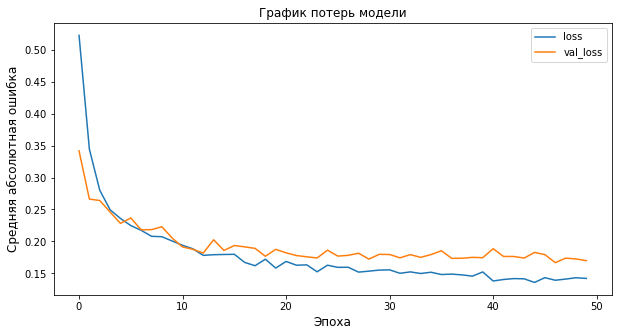

In [93]:
model_loss_plot(history_pr)

9/9 [==============================] - 0s 3ms/step


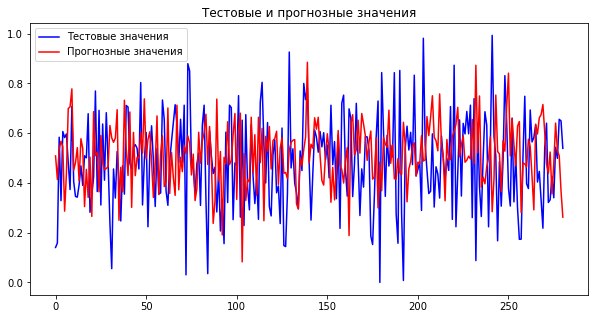

In [94]:
pred_pr = model_pr.predict(np.array((X_test_pr)))
original_pr = y_test_pr.values
predicted_pr = pred_pr

actual_and_predicted_plot(original_pr, predicted_pr)

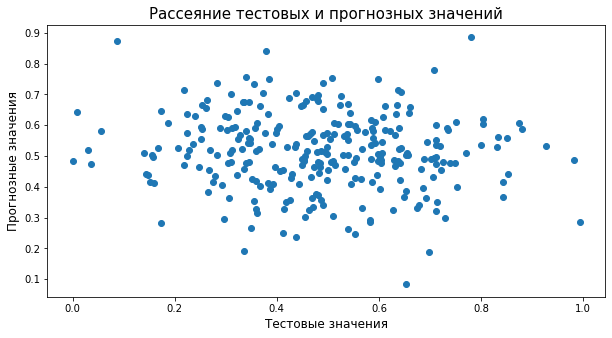

In [95]:
actual_and_predicted_scatter(original_pr, predicted_pr)

In [96]:
print(f'Model MAE: {model_pr.evaluate(X_test_pr, y_test_pr)}')

9/9 [==============================] - 0s 3ms/step - loss: 0.1870
Model MAE: 0.18697868287563324


In [97]:
print(f'MAE среднего значения: {np.mean(np.abs(y_test_pr-np.mean(y_test_pr)))}')

MAE среднего значения: Прочность при растяжении, МПа    0.148804
dtype: float64


c:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Сохраняем модель

In [98]:
pickle.dump(model_pr, open('model_pr.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://9c6cb460-7007-4d1d-961b-6aab443e6dd2/assets


Нейронная сеть для предсказания соотношения матрица-наполнитель

In [99]:
X_train_mn_norm = normalizer.adapt(np.array(X_train_mn))

In [111]:
model_mn = Sequential(X_train_mn_norm)

model_mn.add(Dense(128))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(128))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(64))
model_mn.add(BatchNormalization())
model_mn.add(Dense(64))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(16))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(1))
model_mn.add(Activation('selu'))

In [112]:
model_mn.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.02, momentum=0.5),
    loss='mean_absolute_error')

In [113]:
early_mn = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [114]:
%%time
history_mn = model_mn.fit(
    X_train_mn,
    y_train_mn,
    batch_size = 64,
    epochs=100,
    verbose=1,
    validation_split = 0.2,
    callbacks = [early_mn]
    )

Epoch 1/100
9/9 [==============================] - 6s 119ms/step - loss: 0.5464 - val_loss: 0.3172
Epoch 2/100
9/9 [==============================] - 0s 11ms/step - loss: 0.2662 - val_loss: 0.2814
Epoch 3/100
9/9 [==============================] - 0s 16ms/step - loss: 0.2148 - val_loss: 0.2759
Epoch 4/100
9/9 [==============================] - 0s 17ms/step - loss: 0.1833 - val_loss: 0.2500
Epoch 5/100
9/9 [==============================] - 0s 18ms/step - loss: 0.1752 - val_loss: 0.2467
Epoch 6/100
9/9 [==============================] - 0s 16ms/step - loss: 0.1664 - val_loss: 0.2352
Epoch 7/100
9/9 [==============================] - 0s 16ms/step - loss: 0.1603 - val_loss: 0.2135
Epoch 8/100
9/9 [==============================] - 0s 17ms/step - loss: 0.1506 - val_loss: 0.2023
Epoch 9/100
9/9 [==============================] - 0s 14ms/step - loss: 0.1459 - val_loss: 0.2058
Epoch 10/100
9/9 [==============================] - 0s 16ms/step - loss: 0.1503 - val_loss: 0.1814
Epoch 11/100
9/9 [

In [115]:
model_mn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 128)               1664      
                                                                 
 batch_normalization_10 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_11 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 128)              

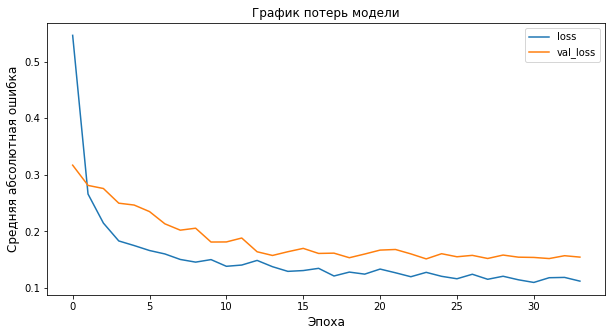

In [116]:
model_loss_plot(history_mn)

9/9 [==============================] - 0s 3ms/step


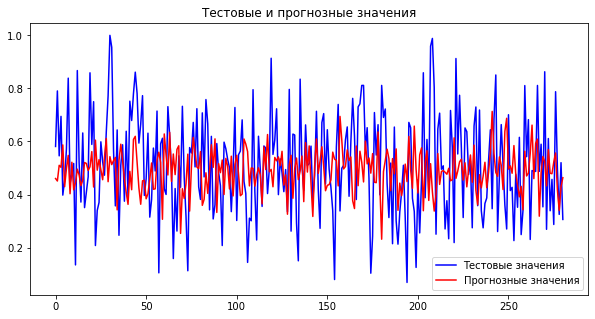

In [117]:
pred_mn = model_mn.predict(np.array((X_test_mn)))
original_mn = y_test_mn.values
predicted_mn = pred_mn

actual_and_predicted_plot(original_mn, predicted_mn)

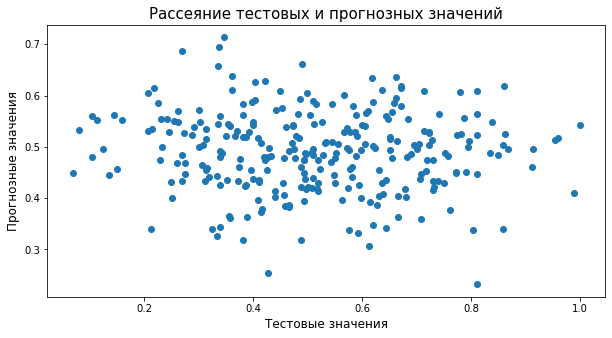

In [118]:
actual_and_predicted_scatter(original_mn, predicted_mn)

In [119]:
print(f'Model MAE: {model_mn.evaluate(X_test_mn, y_test_mn)}')

9/9 [==============================] - 0s 4ms/step - loss: 0.1704
Model MAE: 0.17043443024158478


In [120]:
print(f'MAE среднего значения: {np.mean(np.abs(y_test_mn-np.mean(y_test_mn)))}')

MAE среднего значения: Соотношение матрица-наполнитель    0.155596
dtype: float64


c:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Сохраняем модель

In [121]:
pickle.dump(model_mn, open('model_mn.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://4f86d2bc-038e-4592-b342-4764391527ce/assets
